# 주제 : 차량 대출 상환가능성 예측

- ID,고객 대출 신청 ID
- Client_Income,고객 소득() : DROP
- Car_Owned,다른 차량에 대한 대출을 신청하기 전에 고객이 소유한 모든 차량(0은 아니요, 1은 그렇지 않음을 의미)
- Bike_Owned,고객이 소유한 모든 자전거(0은 아니요, 1은 그렇지 않음을 의미)
- Active_Loan,대출 신청 당시 진행 중인 다른 대출이 있는지 여부(0은 아니요, 1은 그렇지 않음을 의미)
- House_Own,고객이 소유한 주택 수(0은 아니요, 1은 그 외의 주택)
- Child_Count,고객이 보유한 자녀 수
- Credit_Amount,대출의 신용 금액()
- Loan_Annuity,대출 연금()
- Accompany_Client,고객이 대출을 신청할 때 고객과 동행한 사람
- Client_Income_Type,고객 소득 유형
- Client_Education,고객이 달성한 최고 교육 수준
- Client_Marital_Status,"고객의 결혼 상태(D- 이혼, S- 미혼, M- 기혼, W- 사별)"
- Client_Gender,고객의 성별
- Loan_Contract_Type,"대출 유형(CL- 현금대출, RL- 리볼빙대출)"
- Client_Housing_Type,고객 주택 상황
- Population_Region_Relative,고객이 거주하고 있는 지역의 상대적 인구수. 값이 높을수록 고객이 인구가 많은 지역에 거주하고 있음을 의미합니다.
- Age_Days,신청서 제출 시점의 고객 나이
- Employed_Days,"신청 전, 고객이 수입을 시작한 일수"
- Registration_Days,"대출 신청일 전, 고객이 등록을 변경한 일수"
- ID_Days,"대출 신청 며칠 전, 고객이 대출을 신청한 신분증을 변경했습니다."
- Own_House_Age,고객 소유 주택의 나이(년)
- Mobile_Tag,고객이 제공한 휴대폰 번호(1은 예, 0은 아니오를 의미) : drop
- Homephone_Tag,고객이 제공한 집전화 번호(1은 예, 0은 아니오를 의미)
- Workphone_Working,직장 전화 번호로 연락 가능했는지(1은 예, 0은 아니오)
- Client_Occupation,고객 직업 유형
- Client_Family_Members,고객이 보유한 가족 구성원 수
- Cleint_City_Rating,고객 도시 등급. 3은 최고, 2는 좋음, 1은 평균을 나타냅니다.
- Application_Process_Day,고객이 대출을 신청한 요일(0-일,1-월,2-화,3-수,4-목,5-금,6-토)"
- Application_Process_Hour,고객이 대출을 신청한 요일 시간 : DROP
- Client_Permanent_Match_Tag,고객 연락처 주소가 영구 주소와 일치하지 않는 경우 표시.
- Client_Contact_Work_Tag,고객 직장 주소가 연락처 주소와 일치하지 않는 경우 표시.
- Type_Organization,클라이언트가 근무하는 조직 유형
- Score_Source_1,다른 출처에서 얻은 점수. 정규화된 점수입니다.
- Score_Source_2,다른 출처에서 얻은 점수입니다. 정규화된 점수입니다.
- Score_Source_3,다른 소스에서 가져온 점수입니다. 정규화된 점수입니다.
- Social_Circle_Default,지난 60일 동안 대출 상환을 불이행한 고객의 친구/가족 수
- Phone_Change,"대출 신청 며칠 전에 고객이 휴대폰을 변경했는지"
- Credit_Bureau,작년 총 조회 건수
- Default,1은 고객이 대출 상환을 불이행했음을 의미하고 0은 그렇지 않음을 의미합니다.

## 결측치가 만건 이상인 컬럼명
- Own_House_Age,고객 소유 주택의 나이(년) : drop
- Client_Occupation,고객 직업 유형 : Nojob :: DROP
- Type_Organization,클라이언트가 근무하는 조직 유형 : drop
- Score_Source_1,다른 출처에서 얻은 점수. 정규화된 점수입니다. : drop
- Score_Source_3,다른 소스에서 가져온 점수입니다. 정규화된 점수입니다. : drop
- Social_Circle_Default,지난 60일 동안 대출 상환을 불이행한 고객의 친구/가족 수 : drop
- Credit_Bureau, 1년 내 90일 이상 장기연체 등 신용위험이 발생할 가능성을 수치화하여 제공하는 지표 : 평균

## 결측치가 만 건 미만인 컬럼명
- Accompany_Client,고객이 대출을 신청할 때 고객과 동행한 사람 : Drop
- Client_Income_Type,고객 소득 유형 : Drop
- Client_Education,고객이 달성한 최고 교육 수준 : Random
- Client_Marital_Status,"고객의 결혼 상태(D- 이혼, S- 미혼, M- 기혼, W- 사별)" : Random
- Client_Gender,고객의 성별 : Random
- Loan_Contract_Type,"대출 유형(CL- 현금대출, RL- 리볼빙대출)" : Random
- Client_Housing_Type,고객 주택 상황 : Random

## 라이브러리 import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 전처리 모듈들
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import  model_selection
from sklearn.model_selection import train_test_split
from Preprocessing import Preprocessing
from imblearn.over_sampling import SMOTE

# 모델 모듈
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from vecstack import stacking, StackingTransformer
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, mean_squared_error, classification_report
from sklearn.metrics import precision_recall_curve, recall_score

from tensorflow.keras import utils
import tensorflow as tf
# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics


<br>
<br>

# 전처리

In [2]:
df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')


df.isna().sum()


ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [2]:
category_columns = [
    'Car_Owned', 'Bike_Owned', 'Active_Loan', 
    'House_Own', 'Homephone_Tag', 'Workphone_Working', 
    'Cleint_City_Rating', 'Application_Process_Day', 'Client_Permanent_Match_Tag', 
    'Client_Contact_Work_Tag']

In [3]:
category_columns_object = [
    'Client_Education', 'Client_Marital_Status', 
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 
    'Client_Occupation']

In [4]:
numerical_columns=[
    'Child_Count', 'Credit_Amount', 'Loan_Annuity', 
    'Population_Region_Relative', 'Age_Days', 'Employed_Days', 
    'Registration_Days', 'ID_Days', 'Client_Family_Members',
    'Score_Source_2', 'Phone_Change', 'Credit_Bureau', 'Client_Income']

In [5]:
total_category_column = list()
for column in category_columns:
    total_category_column.append(column)
    
for column in category_columns_object:
    total_category_column.append(column)

In [6]:
# 인스턴스 생성
preprocessing_db = Preprocessing()
# 결측치 제거
preprocessing_db.drop_columns()
# 연속형 데이터 대체
preprocessing_db.numerical_columns_replace()
# 범주형 데이터 대체ㅐ
preprocessing_db.category_columns_replace()

In [7]:
data_df = preprocessing_db.get_df()
target_df = preprocessing_db.get_target_df()

In [8]:
data_df.head(3)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Education,Client_Marital_Status,...,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Score_Source_2,Phone_Change,Credit_Bureau
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Secondary,M,...,0,Sales,2.0,2.0,6.0,Yes,Yes,0.478787,63.000000,1.891082
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Graduation,M,...,1,Nojob,2.0,2.0,3.0,Yes,Yes,0.215068,962.106056,1.891082
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Graduation dropout,W,...,0,Realty agents,2.0,2.0,4.0,Yes,Yes,0.552795,277.000000,0.000000


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, test_size=0.3, random_state=42)

In [10]:
numeric_transformer = StandardScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore') 

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, total_category_column)])

In [11]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [12]:
preprocessor_pipe.fit(x_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Child_Count',
                                                   'Credit_Amount',
                                                   'Loan_Annuity',
                                                   'Population_Region_Relative',
                                                   'Age_Days', 'Employed_Days',
                                                   'Registration_Days',
                                                   'ID_Days',
                                                   'Client_Family_Members',
                                                   'Score_Source_2',
                                                   'Phone_Change',
                                                   'Credit_Bureau',
                                                   'Client_Income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Car_Owned', 'Bike_Owned',
                                                   'Active_Loan', 'House_Own',
                                                   'Homephone_Tag',
                                                   'Workphone_Working',
                                                   'Cleint_City_Rating',
                                                   'Application_Process_Day',
                                                   'Client_Permanent_Match_Tag',
                                                   'Client_Contact_Work_Tag',
                                                   'Client_Education',
                                                   'Client_Marital_Status',
                                                   'Client_Gender',
                                                   'Loan_Contract_Type',
                                                   'Client_Housing_Type',
                                                   'Client_Occupation'])]))])

In [13]:
x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

In [14]:
oversample = SMOTE(random_state=42)

x_train_over, y_train_over = oversample.fit_resample(x_train_transformed, y_train)

<br>
<br>

# 모델
1. stacking

In [15]:
estimators = [ 
    ('ExtraTrees', ensemble.ExtraTreesClassifier(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3)),
    ('RandomForest', ensemble.RandomForestClassifier(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3)),
    ('DecisionTree', DecisionTreeClassifier()),
]

In [16]:
stack = StackingTransformer(estimators, 
                            regression = False, 
                            metric = accuracy_score,
                            n_folds = 2, stratified = True, shuffle = True, 
                            random_state = 42, verbose = 2) 

In [17]:
# fit을 통해 분류함
stack = stack.fit(x_train_over, y_train_over)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    fold  0:  [0.69672926]
    fold  1:  [0.69248138]
    ----
    MEAN:     [0.69460532] + [0.00212394]

estimator  1: [RandomForest: RandomForestClassifier]
    fold  0:  [0.74262680]
    fold  1:  [0.73618481]
    ----
    MEAN:     [0.73940581] + [0.00322099]

estimator  2: [DecisionTree: DecisionTreeClassifier]
    fold  0:  [0.88961884]
    fold  1:  [0.88343198]
    ----
    MEAN:     [0.88652541] + [0.00309343]



In [18]:
# transform을 통해 학습시킴
S_train = stack.transform(x_train_over)
# transform을 통해 학습시킴
S_test = stack.transform(x_test_transformed)

Train set was detected.
Transforming...

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  1: [RandomForest: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  2: [DecisionTree: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

Transforming...

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  1: [RandomForest: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  2: [DecisionTree: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE



In [1]:
# XGBClassification의 hyper-parameter
params = {
    'learning_rate' : [1, 0.1, 0.01, 0.001],
    'n_estimators' : [100, 1000],
    'max_depth' : [3, 4, 5],
    'eval_metric' : ['mlogloss'],
    'n_jobs' : [-1],
    'seed' : [0],
}

In [2]:
# GridSearch를 통해 HPO 찾기
# grid = GridSearchCV(
#     XGBClassifier(),
#     params,
#     refit=True, verbose=1
# )
# y_pred = grid.fit(S_train, y_train_over)
# y_pred.best_params_

xgboost_best_params = {
    'eval_metric': 'mlogloss',
    'learning_rate': 1,
    'max_depth': 3,
    'n_estimators': 100,
    'n_jobs': -1,
    'seed': 0
}

NameError: name 'GridSearchCV' is not defined

In [21]:
# xgboost_best_params = y_pred.best_params_

# HPO 적용
stack_model = XGBClassifier(**xgboost_best_params)
# 투표를 통해 얻은 S_train과 y_train을 다시 학습시킴
model = stack_model.fit(S_train, y_train_over)

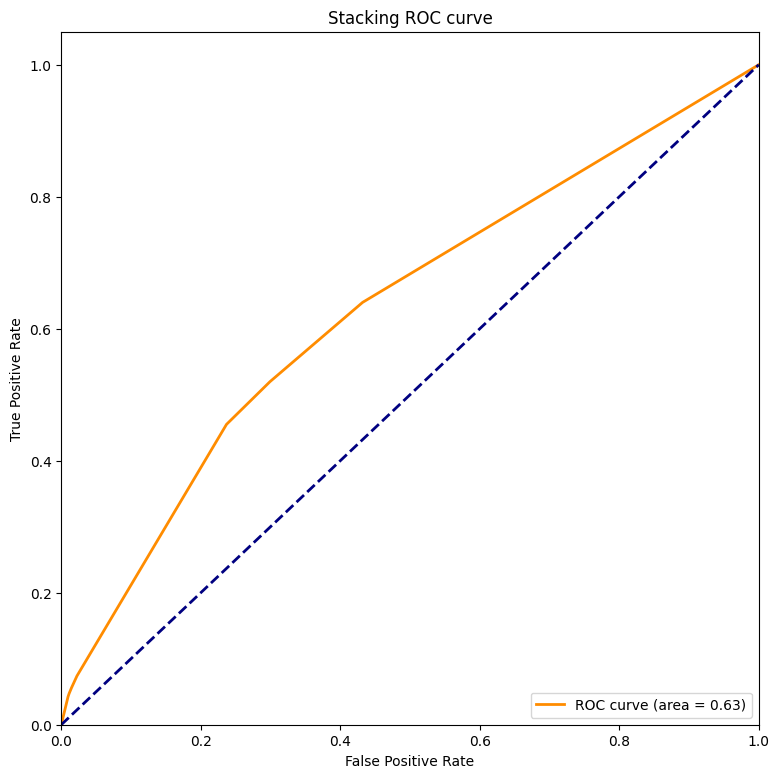

In [22]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=stack_model.predict_proba(S_test)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("Stacking Model ROC curve")
plt.title("Stacking ROC curve")
plt.show()

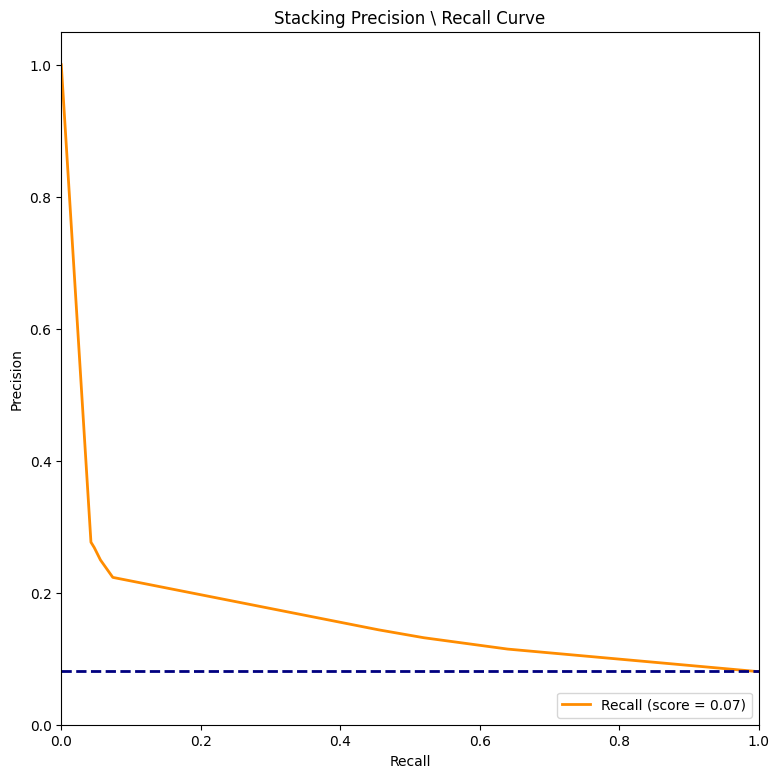

In [23]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=model.predict_proba(S_test)[:,1])
recall = recall_score(y_test, model.predict(S_test))


plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("Stacking Precision \ Recall Curve")
plt.show()

In [24]:
predictions = model.predict(S_test)
print(classification_report(y_test, predictions))
print("Accuracy on Training set: {:.3f}".format(model.score(S_train, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(model.score(S_test, y_test)))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     33619
           1       0.22      0.07      0.11      2938

    accuracy                           0.90     36557
   macro avg       0.57      0.53      0.53     36557
weighted avg       0.87      0.90      0.88     36557

Accuracy on Training set: 0.887
Accuracy on Test set: 0.905


<br>
<br>

# 모델
2. SVM

In [25]:
params = {
    'C' : [1, 10, 100, 1000],
    'kernel' : ['rbf'],
    'gamma' : [0.1, 0.01, 0.001],
    'max_iter' : [3, 4, 5],
}

In [26]:
# # GridSearch를 통해 HPO 찾기
grid = GridSearchCV(
    svm.SVC(),
    params,
    refit=True, verbose=1
)
y_pred = grid.fit(x_train_over, y_train_over)
y_pred.best_params_

scv_best_params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 3}
 

In [27]:
scv = svm.SVC(**scv_best_params, probability=True)

In [28]:
scv.fit(x_train_over, y_train_over)

SVC(C=10, gamma=0.1, max_iter=3, probability=True)

In [29]:
pridict_y = scv.predict(x_test_transformed)

In [30]:
print(classification_report(y_test, pridict_y))
print("Accuracy on Training set: {:.3f}".format(scv.score(x_train_over, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(scv.score(x_test_transformed, y_test)))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71     33619
           1       0.10      0.52      0.16      2938

    accuracy                           0.57     36557
   macro avg       0.51      0.55      0.44     36557
weighted avg       0.87      0.57      0.67     36557

Accuracy on Training set: 0.609
Accuracy on Test set: 0.574


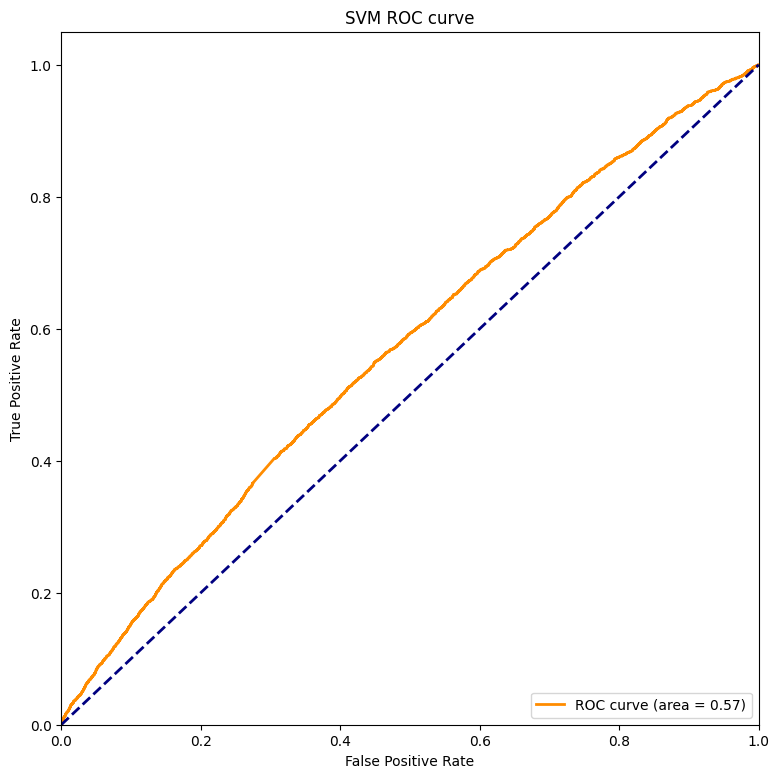

In [31]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=scv.predict_proba(x_test_transformed)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("SVM ROC curve")
plt.show()

In [32]:
# recall = recall_score(y_test, scv.predict(x_test_transformed))

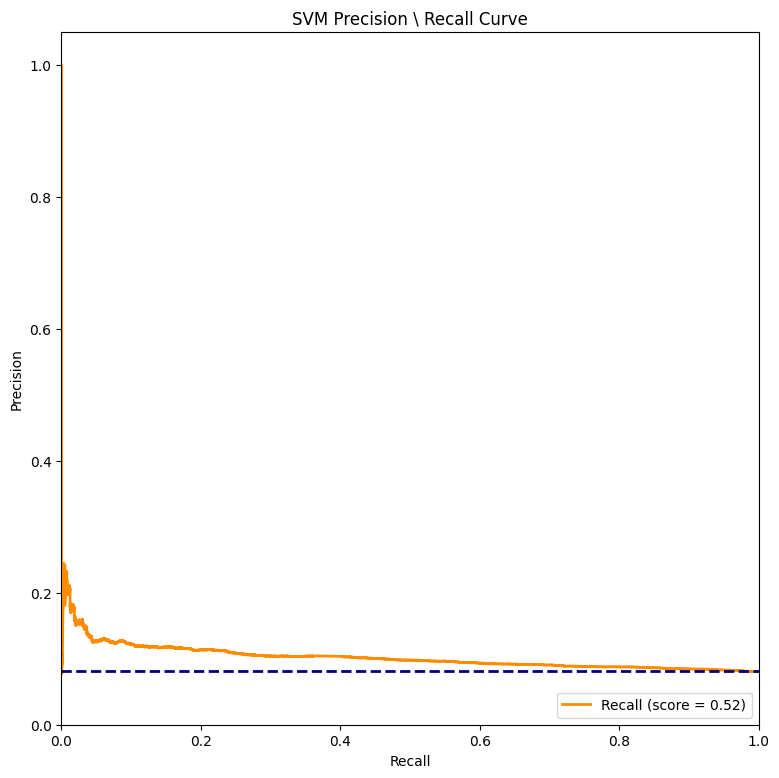

In [33]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=scv.predict_proba(x_test_transformed)[:,1])
recall = recall_score(y_test, scv.predict(x_test_transformed))

plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("SVM Precision \ Recall Curve")
plt.show()

<br>
<br>

# 모델
3. xgboost

In [34]:
xgb = XGBClassifier(**xgboost_best_params)

In [35]:
xgb.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [36]:
pridict_y = xgb.predict(x_test_transformed)

In [37]:
print(classification_report(y_test, pridict_y))
print("Accuracy on Training set: {:.3f}".format(xgb.score(x_train_over, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(xgb.score(x_test_transformed, y_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     33619
           1       0.26      0.05      0.08      2938

    accuracy                           0.91     36557
   macro avg       0.59      0.52      0.52     36557
weighted avg       0.87      0.91      0.88     36557

Accuracy on Training set: 0.950
Accuracy on Test set: 0.913


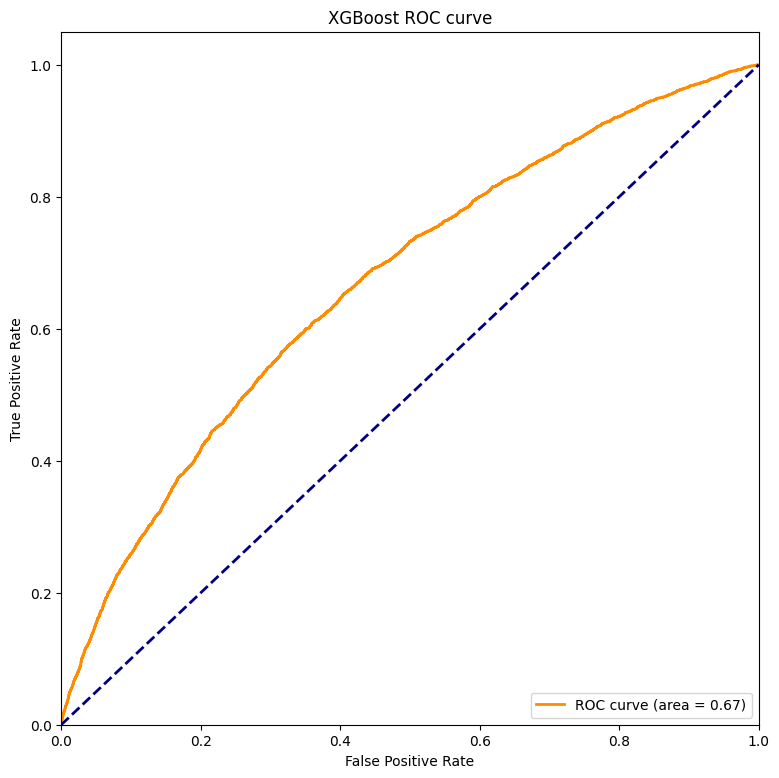

In [38]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=xgb.predict_proba(x_test_transformed)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("XGBoost ROC curve")
plt.show()

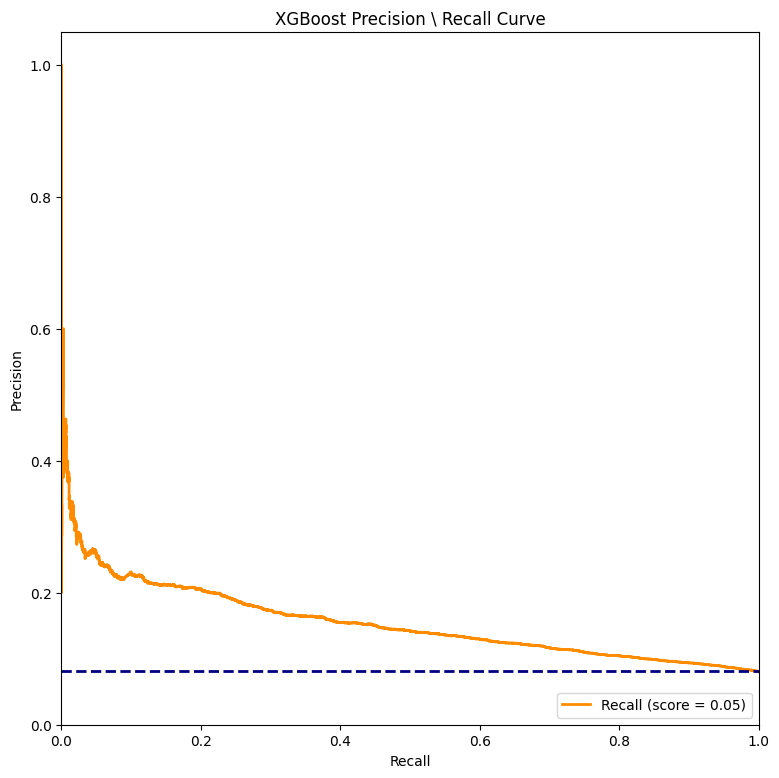

In [39]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=xgb.predict_proba(x_test_transformed)[:,1])
recall = recall_score(y_test, xgb.predict(x_test_transformed))

plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("XGBoost Precision \ Recall Curve")
plt.show()

<br>
<br>

# 모델
4. RandomForest

In [40]:
params = { 
    'n_estimators' : [10, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [41]:
# # GridSearch를 통해 HPO 찾기
# grid = GridSearchCV(
#     RandomForestClassifier(),
#     params,
#     refit=True, verbose=1
# )
# y_pred = grid.fit(S_train, y_train_over)
# y_pred.best_params_
randomforest_best_params = {
    'max_depth': 6,
    'min_samples_leaf': 8,
    'min_samples_split': 8,
    'n_estimators': 10}

In [42]:
rfc = RandomForestClassifier(**randomforest_best_params, random_state=42)
rfc.fit(x_train_over, y_train_over)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=10, random_state=42)

In [43]:
# y값 예측하기
pridict_y = rfc.predict(x_test_transformed)

In [44]:
print(classification_report(y_test, pridict_y))
print("Accuracy on Training set: {:.3f}".format(rfc.score(x_train_over, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(rfc.score(x_test_transformed, y_test)))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83     33619
           1       0.14      0.46      0.21      2938

    accuracy                           0.72     36557
   macro avg       0.54      0.60      0.52     36557
weighted avg       0.88      0.72      0.78     36557

Accuracy on Training set: 0.785
Accuracy on Test set: 0.723


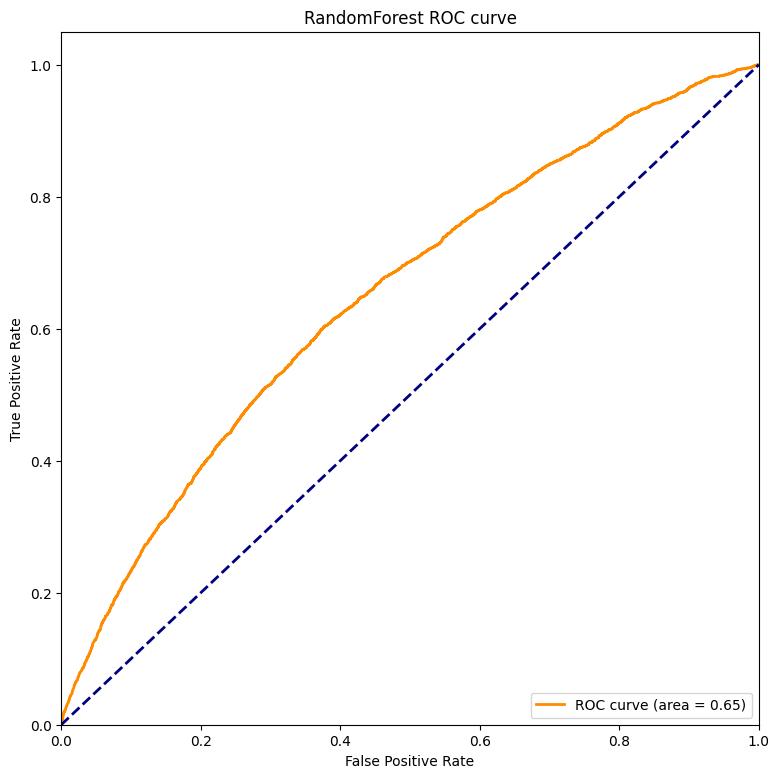

In [45]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=rfc.predict_proba(x_test_transformed)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("RandomForest ROC curve")
plt.show()

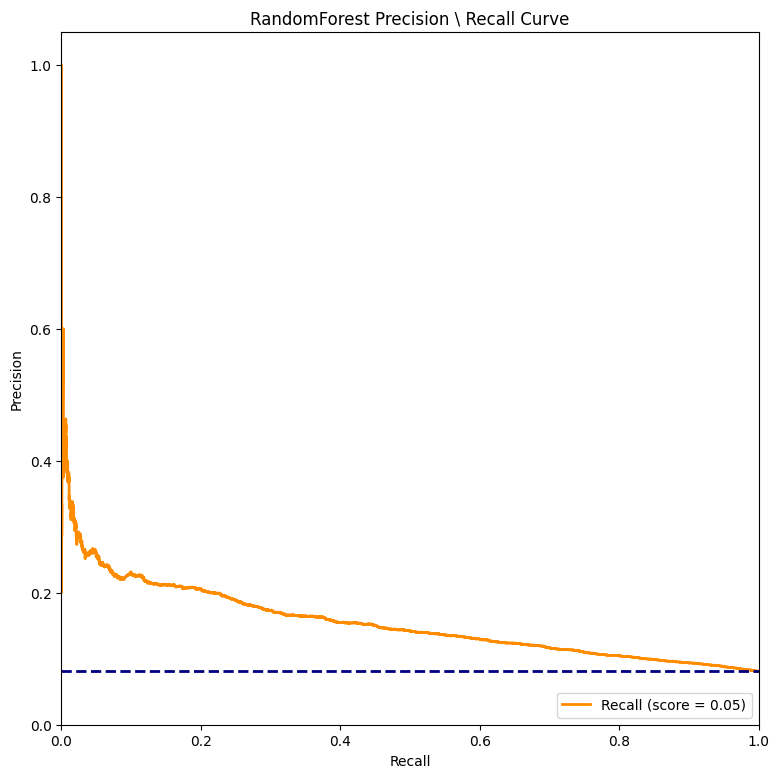

In [46]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=xgb.predict_proba(x_test_transformed)[:,1])
recall = recall_score(y_test, xgb.predict(x_test_transformed))

plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("RandomForest Precision \ Recall Curve")
plt.show()

<br>
<br>

# 모델
5. GradientBoosting

In [47]:
# XGBClassification의 hyper-parameter
params = {
    'n_estimators' : [10, 100, 1000],
    'max_depth' : [3, 4, 5],
    'learning_rate' : [1, 0.1, 0.01, 0.001],
    'min_samples_split' : [3, 4, 5],
}

In [48]:
# # GridSearch를 통해 HPO 찾기
# grid = GridSearchCV(
#     GradientBoostingClassifier(),
#     params,
#     refit=True, verbose=1
# )
# y_pred = grid.fit(S_train, y_train_over)
# y_pred.best_params_
gradientboosting_best_params = {
    'n_estimators' : 100,
    'max_depth' : 5,
    'learning_rate' : 0.01,
    'min_samples_split' : 5
}

In [49]:
gbc = GradientBoostingClassifier(**gradientboosting_best_params)

In [50]:
gbc.fit(x_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=5)

In [51]:
pridict_y = gbc.predict(x_test_transformed)

In [52]:
print(classification_report(y_test, pridict_y))
print("Accuracy on Training set: {:.3f}".format(gbc.score(x_train_over, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(gbc.score(x_test_transformed, y_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     33619
           1       0.13      0.38      0.20      2938

    accuracy                           0.75     36557
   macro avg       0.53      0.58      0.52     36557
weighted avg       0.87      0.75      0.80     36557

Accuracy on Training set: 0.791
Accuracy on Test set: 0.752


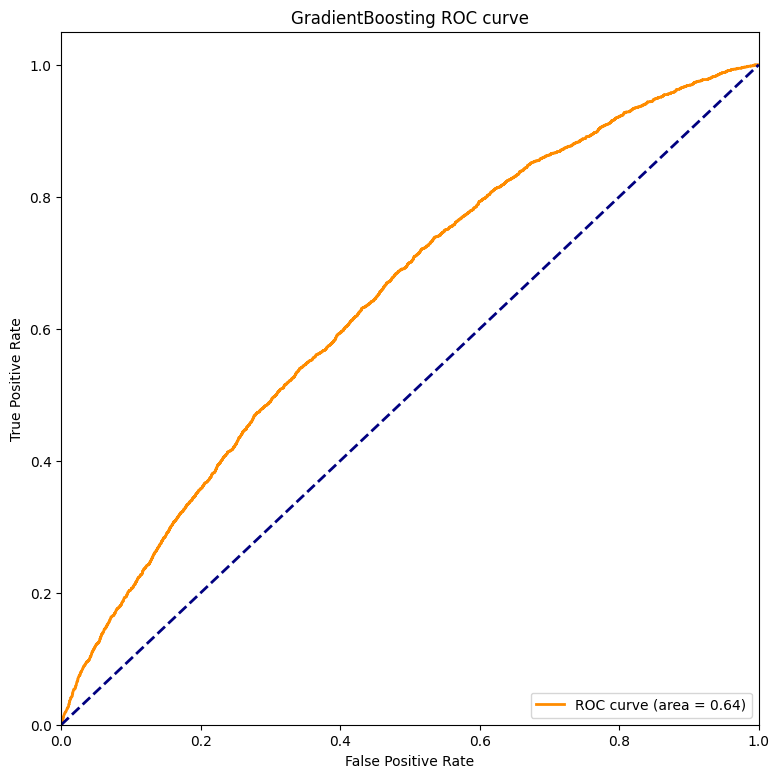

In [53]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=gbc.predict_proba(x_test_transformed)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("GradientBoosting ROC curve")
plt.show()

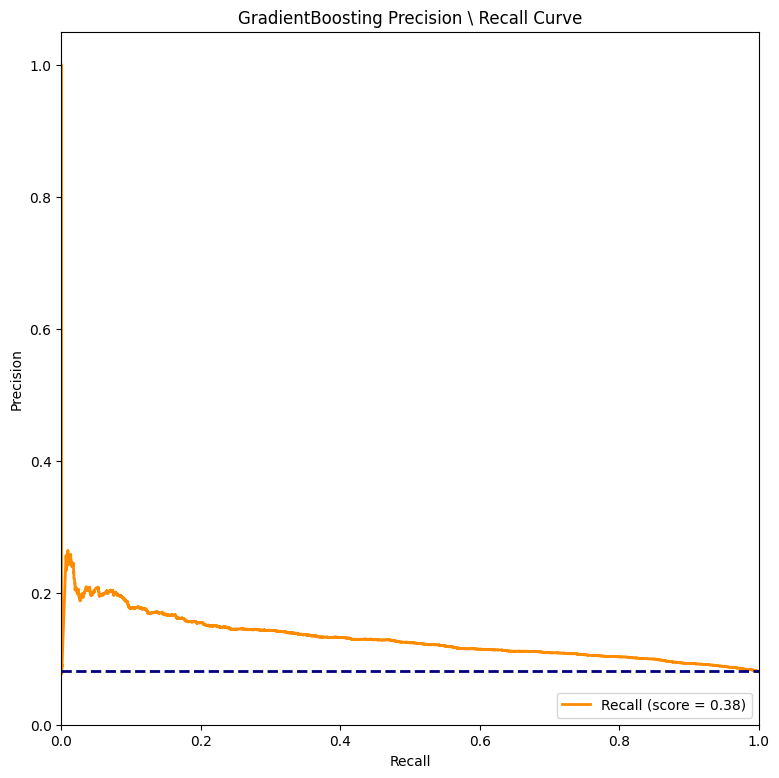

In [54]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=gbc.predict_proba(x_test_transformed)[:,1])
recall = recall_score(y_test, gbc.predict(x_test_transformed))

plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("GradientBoosting Precision \ Recall Curve")
plt.show()

<br>
<br>

# 모델
6. LogisticRegression

In [55]:
# params = {
#     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : [0.5, 1.0, 1.5],
# }
logistic_best_params = {'C': 0.5, 'penalty': 'l2'}

In [67]:
# grid = GridSearchCV(
#     LogisticRegression(),
#     params,
#     refit=True, verbose=1
# )
# y_pred = grid.fit(S_train, y_train_over)
# y_pred.best_params_

In [70]:
logis = LogisticRegression(**logistic_best_params)

In [71]:
logis.fit(x_train_over, y_train_over)

LogisticRegression(C=0.5)

In [72]:
pridict_y = logis.predict(x_test_transformed)

In [73]:
print(classification_report(y_test, pridict_y))
print("Accuracy on Training set: {:.3f}".format(logis.score(x_train_over, y_train_over)))
print("Accuracy on Test set: {:.3f}".format(logis.score(x_test_transformed, y_test)))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     33619
           1       0.13      0.60      0.21      2938

    accuracy                           0.65     36557
   macro avg       0.54      0.62      0.49     36557
weighted avg       0.88      0.65      0.73     36557

Accuracy on Training set: 0.661
Accuracy on Test set: 0.647


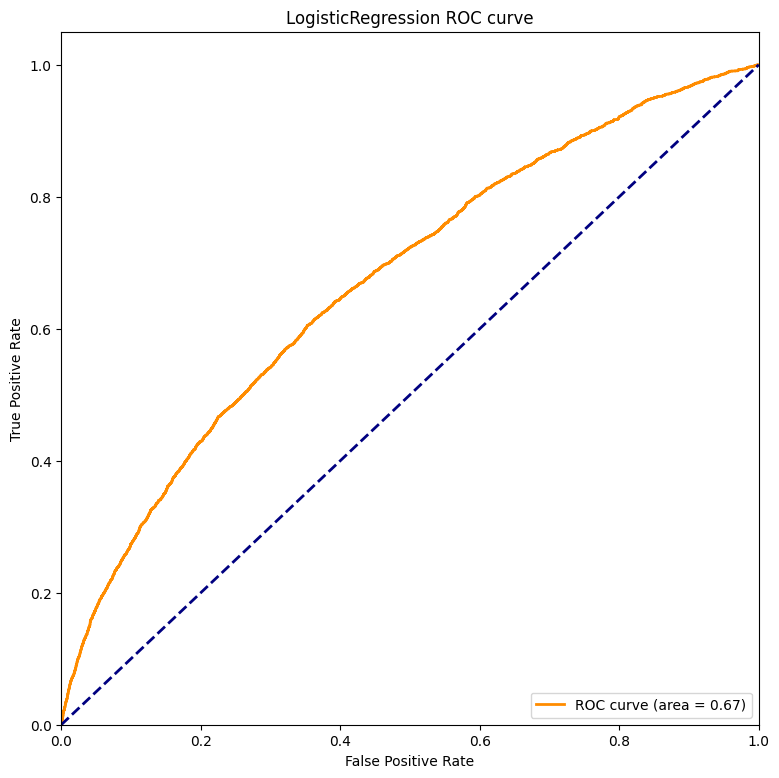

In [74]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=logis.predict_proba(x_test_transformed)[:,1])

roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("LogisticRegression ROC curve")
plt.show()

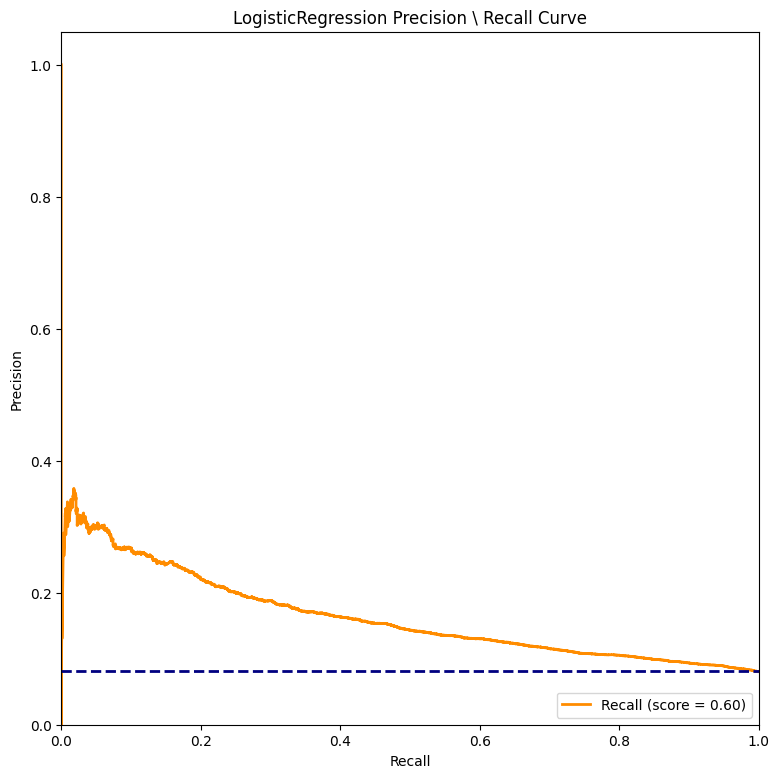

In [75]:
# Precision-Recall Curve 그리기
fpr, tpr, _ = precision_recall_curve(y_true=y_test, probas_pred=logis.predict_proba(x_test_transformed)[:,1])
recall = recall_score(y_test, logis.predict(x_test_transformed))

plt.figure(figsize=(9, 9))
plt.plot(tpr, fpr, color='darkorange', lw=2, label='Recall (score = %0.2f)' % recall)

base_rate = target_df.mean()
plt.plot([0,1],[base_rate,base_rate], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
plt.title("LogisticRegression Precision \ Recall Curve")
plt.show()